In [1]:
import numpy as np
import pandas as pd

# Entree des donnes

In [18]:
df = pd.read_csv('orange.csv',sep=";", header=0,index_col=0)
df = df.select_dtypes(exclude=['object'])

In [21]:
X = df.to_numpy()
X

array([[  2.82,   2.53,   1.66,   3.46,   3.15,   2.97,   2.6 ,  25.32,
         27.36,  36.45,  89.95,   3.59,  13.98,   0.84,  43.44],
       [  2.76,   2.82,   1.91,   3.23,   2.55,   2.08,   3.32,  17.33,
         20.  ,  44.15,  82.55,   3.89,  11.14,   0.67,  32.7 ],
       [  2.83,   2.88,   4.  ,   3.45,   2.42,   1.76,   3.38,  23.65,
         25.65,  52.12, 102.22,   3.85,  11.51,   0.69,  37.  ],
       [  2.76,   2.59,   1.66,   3.37,   3.05,   2.56,   2.8 ,  32.42,
         34.54,  22.92,  90.71,   3.6 ,  15.75,   0.95,  36.6 ],
       [  3.2 ,   3.02,   3.69,   3.12,   2.33,   1.97,   3.34,  22.7 ,
         25.32,  45.8 ,  94.87,   3.82,  11.8 ,   0.71,  39.5 ],
       [  3.07,   2.73,   3.34,   3.54,   3.31,   2.63,   2.9 ,  27.16,
         29.48,  38.94,  96.51,   3.68,  12.21,   0.74,  27.  ]])

In [22]:
mean_vector = np.mean(X,axis=0)
ecart_type_vector = np.std(X,axis=0)

In [25]:
def z_score(x):
    mean_vector = np.mean(x,axis=0)
    ecart_type_vector = np.std(x,axis=0)
    return(x-mean_vector)/ecart_type_vector
def centre_matrix(x):
    mean_vector = np.mean(x,axis=0)
    return(x-mean_vector)

In [9]:
def min_max(x):
    return (x-np.min(x,axis=0))/(np.min(x,axis=0)-np.max(x,axis=0))

In [23]:
min_max(X)
z_score(X)

array([[-0.51619419, -1.38330715, -1.06188892,  0.68104634,  0.91325605,
         1.51984078, -1.5040422 ,  0.12175045,  0.06838537, -0.39456601,
        -0.46636129, -1.23408928,  0.76842503,  0.74501401,  1.42923918],
       [-0.8735594 ,  0.34831475, -0.80905822, -0.91190951, -0.65981658,
        -0.58819812,  0.86729441, -1.62576955, -1.60006649,  0.4462527 ,
        -1.67655657,  1.26182162, -0.97976756, -0.98206392, -0.64508903],
       [-0.45663332,  0.70658135,  1.30460638,  0.61178739, -1.00064898,
        -1.34614469,  1.06490579, -0.24350091, -0.31925766,  1.31655465,
         1.54027332,  0.9290335 , -0.75201007, -0.77887828,  0.18541481],
       [-0.8735594 , -1.02504055, -1.06188892,  0.05771579,  0.65107728,
         0.54872174, -0.84533759,  1.67461554,  1.6960327 , -1.87200458,
        -0.34207096, -1.15089225,  1.85796759,  1.86253502,  0.10815864],
       [ 1.74711881,  1.54253675,  0.99109632, -1.67375795, -1.23660987,
        -0.84874225,  0.93316487, -0.45127863, 

In [27]:
matrice_centre =centre_matrix(X)
matrice_centre_reduit=z_score(X)
matrice_covariance = (1/X.shape[0])*np.dot(matrice_centre.T,matrice_centre)
matrice_correlation = (1/X.shape[0])*np.dot(matrice_centre_reduit.T,matrice_centre_reduit)

In [28]:
matrice_correlation

array([[ 1.        ,  0.58226907,  0.65636358, -0.26790383, -0.14513828,
        -0.15384998,  0.2332185 , -0.04547063, -0.02129559,  0.30384692,
         0.41362285,  0.13847275, -0.35579729, -0.34456836, -0.14739961],
       [ 0.58226907,  1.        ,  0.7676219 , -0.61699781, -0.83784599,
        -0.8775382 ,  0.92309965, -0.56975482, -0.55461204,  0.75664308,
         0.31786911,  0.85376925, -0.77733435, -0.77816109, -0.13677696],
       [ 0.65636358,  0.7676219 ,  1.        , -0.02007904, -0.46820605,
        -0.64380421,  0.62974607, -0.1705263 , -0.17272726,  0.71768068,
         0.82433117,  0.51465053, -0.62505188, -0.6222809 , -0.21980834],
       [-0.26790383, -0.61699781, -0.02007904,  1.        ,  0.72748916,
         0.51378162, -0.56861744,  0.48598542,  0.45764596, -0.19637453,
         0.38612071, -0.53763957,  0.27120568,  0.27714857, -0.26561674],
       [-0.14513828, -0.83784599, -0.46820605,  0.72748916,  1.        ,
         0.91370376, -0.90057401,  0.62908643, 

In [74]:
def valeur_vecteur_propre(matrice_correlation):
        return np.linalg.eig(matrice_correlation)

In [82]:
valeur,vecteur = valeur_vecteur_propre(matrice_correlation)
# valeur = np.real_if_close(valeur,tol=1000)
# vecteur = np.real_if_close(vecteur,tol=1000)
vecteur = np.real(vecteur)
valeur = np.real(valeur)

In [101]:
composante_principale = np.dot(matrice_centre_reduit,vecteur)

In [ ]:
composante_principale

In [92]:
inertie_totale = sum(valeur)
inertie_partiel = valeur/inertie_totale
inertie_partiel[inertie_partiel<=1e-3]=1e-10

In [71]:
# np.around(inertie_partiel*100,2)
vecteur = np.real(vecteur)

In [103]:
matrice_covariance_v = (1/X.shape[0])*np.dot(matrice_centre,matrice_centre.T)
matrice_correlation_v = (1/X.shape[0])*np.dot(matrice_centre_reduit,matrice_centre_reduit.T)

In [104]:

valeur_v,vecteur_v = valeur_vecteur_propre(matrice_correlation_v)

In [109]:
# composante_principale_v = np.dot(matrice_centre_reduit.T,np.dot((1/X.shape[0])*np.eye(X.shape[0]),vecteur_v))
composante_principale_v = np.dot(matrice_centre_reduit.T,np.dot((1/X.shape[0])*np.eye(X.shape[0]),vecteur_v))

In [110]:
composante_principale_v

array([[-1.45163916e-01,  2.28367456e-01, -1.38777878e-16,
        -5.84350969e-02,  1.71387347e-01,  2.46280584e-01],
       [-3.78846414e-01,  8.11762167e-02, -3.01841885e-16,
        -9.48702934e-02, -1.74842988e-02,  8.51258472e-02],
       [-2.72902420e-01,  3.01784805e-01,  4.30211422e-16,
        -1.92276847e-02,  2.19239019e-02, -1.63250094e-02],
       [ 2.14022971e-01,  1.88275601e-01, -1.52655666e-16,
         2.35888560e-01, -1.76964804e-03, -1.72529964e-01],
       [ 3.48275675e-01,  6.89176021e-02,  2.91433544e-16,
         1.88179702e-01,  3.79862393e-02,  6.13720645e-02],
       [ 3.59085559e-01, -3.15032368e-02, -2.42861287e-16,
         1.07022402e-01,  1.47413911e-01,  5.95576907e-02],
       [-3.87138818e-01,  2.26088593e-03, -1.52655666e-16,
        -5.68352191e-02, -1.16317967e-01, -4.99793096e-03],
       [ 3.26971506e-01,  2.01481604e-01,  1.17961196e-16,
        -1.07509937e-01, -8.66312563e-02,  9.90468837e-03],
       [ 3.25042972e-01,  1.99585128e-01,  9.575

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

Text(0, 0.5, 'composant 2: 17.23%')

<Figure size 2880x2880 with 0 Axes>

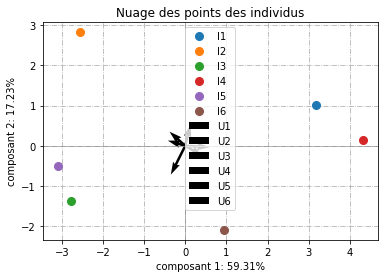

In [113]:
plt.figure(figsize=(40.0,40))
fig, ax = plt.subplots()
for i in range(composante_principale.shape[0]):
    plt.plot(composante_principale[i,0], composante_principale[i,1], 'o', markersize=8,  label=f"I{i+1}")
for j in range(vecteur.shape[0]):
    plt.quiver(0, 0,vecteur[j,0] , vecteur[j,1] , angles = 'xy', scale_units = 'xy',scale = 1,label=f"U{j+1}")
ax.axhline(0.0, color='gray', linewidth=0.5)
ax.axvline(0.0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='-.')
plt.title('Nuage des points des individus')
plt.legend(loc='best')
plt.xlabel(f'composant 1: {round(inertie_partiel[0]*100,2)}%')
plt.ylabel(f'composant 2: {round(inertie_partiel[1]*100,2)}%')

Text(0, 0.5, 'composant 2: 17.23%')

<Figure size 2880x2880 with 0 Axes>

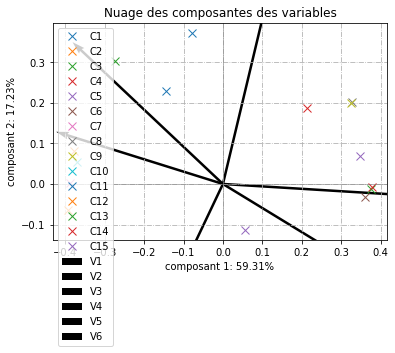

In [114]:
plt.figure(figsize=(40.0,40))
fig, ax = plt.subplots()
for i in range(composante_principale_v.shape[0]):
    plt.plot(composante_principale_v[i,0], composante_principale_v[i,1], 'x', markersize=8,  label=f"C{i+1}")
for j in range(vecteur_v.shape[0]):
    plt.quiver(0, 0,vecteur_v[j,0] , vecteur_v[j,1] ,angles = 'xy',scale_units ='xy',scale =1,label=f"V{j+1}")
plt.Circle((0, 0), 1)
ax.axhline(0.0, color='gray', linewidth=0.5)
ax.axvline(0.0, color='gray', linewidth=0.5)
plt.grid(True, linestyle='-.')
plt.title('Nuage des composantes des variables')
plt.legend(loc='best')
plt.xlabel(f'composant 1: {round(inertie_partiel[0]*100,2)}%')
plt.ylabel(f'composant 2: {round(inertie_partiel[1]*100,2)}%')